
In the paper An authorship analysis of the Jack the Ripper letters, a cluster analysis of the letters from `Jack the Ripper Corpus' is carried out using the Jaccard distance of word 2-grams. The results of the paper support the hypothesis that the two most iconic texts responsible for the creation of the persona of Jack the Ripper were written by the same person. In addition, there is also evidence that a link exists between these texts and another of the key texts in the case, the Moab and Midian letter.
Use `Jack the Ripper Corpus' from the paper and reproduce the above study. Calculate 2-gram distance between each two letters, and perform k-means and hierarchical cluster analysis. Additionally, check similarity between the documents using Jaccard score, the same as in the Nini's paper. You are expected to do some research on Jaccard score yourselves, read the documentation of sklearn and implement it. What is your conclusion about the authorship of the letters? Does your analysis support the findings in Nini's paper?


In [1]:
import os
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
#from scipy.spatial import distance
import scipy.spatial.distance as ssd
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import jaccard_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# add comments generally
# add comments before vectorizers for ngram options 2,2 and 1,2

In [3]:
dir = 'fqx065_jack_the_ripper_corpus'
letters = []
letter_names = []
for file in os.listdir(dir):
    if file.endswith(".txt"):
        with open(os.path.join(dir, file), 'r', encoding = 'ISO-8859-1') as raw:
            r_letter = raw.read()
            letters.append(r_letter)
            letter_names.append(file)

In [4]:
def preprocess(text):
    # lowercase
    text = text.lower()
    
    # remove '[illegible]' 
    text = re.sub(r'\[illegible\]', '', text)
    
    # remove '[?]' from the text
    text = re.sub(r'\[\?\]', '', text)
    
    text_words = [token for token in word_tokenize(text) if token.isalnum()]
    
    preprocessed_text = ' '.join(text_words)
    
    return preprocessed_text


In [5]:
letters_preprocessed = [preprocess(letter) for letter in letters]

### Bigram Distances with TF-IDF Vectorizer

In [6]:
vectorizer_tfidf = TfidfVectorizer(ngram_range = (2,2), use_idf=True)
#when ngram_range = (1,2) three groups in dendrogram
tfidf_matrix = vectorizer_tfidf.fit_transform(letters_preprocessed)

bigram_distance_tfidf = euclidean_distances(tfidf_matrix)

/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

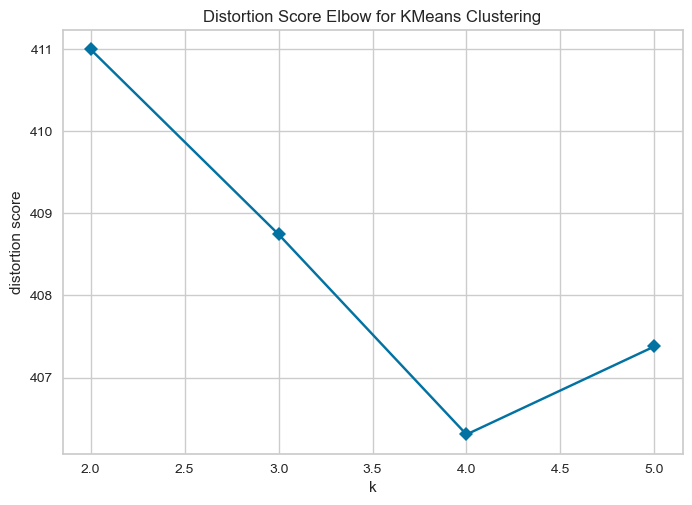

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
#########Why does it keep changing?

# Create KMeans model
model = KMeans()

# Create KElbowVisualizer with KMeans model
visualizer = KElbowVisualizer(model, k = (2,6), timings = False, locate_elbow = False)

# Fit the visualizer with the Jaccard distance matrix
visualizer.fit(bigram_distance_tfidf)

# Visualize the curve
visualizer.show()

In [8]:
km = KMeans(n_clusters = 4) 
clusters = km.fit_predict(bigram_distance_tfidf) 

for x in range(len(letter_names)):
    print(letter_names[x], clusters[x])

/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


JR_191188_4.txt 3
UNK_041088.txt 3
JR_221188.txt 2
JR_220789_2.txt 3
JR_191188_5.txt 2
JR_311088.txt 2
MH_241188_2.txt 2
JR_121188_3.txt 2
JR_211288.txt 0
JR_191088_2.txt 3
JR_240789.txt 2
BB_281188.txt 3
JM_110989.txt 0
JR_271188_2.txt 2
JR_071088.txt 0
JR_171088.txt 2
JR_280989.txt 3
JR_071089.txt 2
UNK_221088.txt 0
JR_211188_4.txt 2
JR_121188_2.txt 2
JR_280190.txt 2
JC_161188.txt 2
JR_160989.txt 2
JC_051088.txt 0
JW_141188.txt 0
JR_161088.txt 3
JR_151188.txt 2
JR_051188.txt 2
JR_250789.txt 3
JR_191188_2.txt 0
UNK_161088 - FROM HELL.txt 0
JR_191188_3.txt 3
JR_161089.txt 3
IM_270491.txt 0
JR_291088.txt 0
JR_211188_3.txt 2
JR_301089.txt 0
JR_231188.txt 2
JR_071089_2.txt 3
JR_201088.txt 2
JC_080189.txt 0
JR_211188_2.txt 3
JR_121188_4.txt 0
JR_300989.txt 0
JR_071188.txt 2
JR_171188.txt 0
JR_151088_2.txt 0
JR_041088.txt 0
JR_UNK_9.txt 3
JR_040989.txt 0
JR_201088_3.txt 2
JR_070889.txt 3
JB_150189.txt 2
JR_180789.txt 3
JR_201088_2.txt 3
JJ_191088.txt 3
JR_151188_6.txt 0
JR_UNK_8.txt 3
UNK_3

/var/folders/8p/tfttmv8n3g34725p_r5jvgxc0000gn/T/ipykernel_59645/2969336187.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  ward = linkage(bigram_distance_tfidf, method = 'ward')


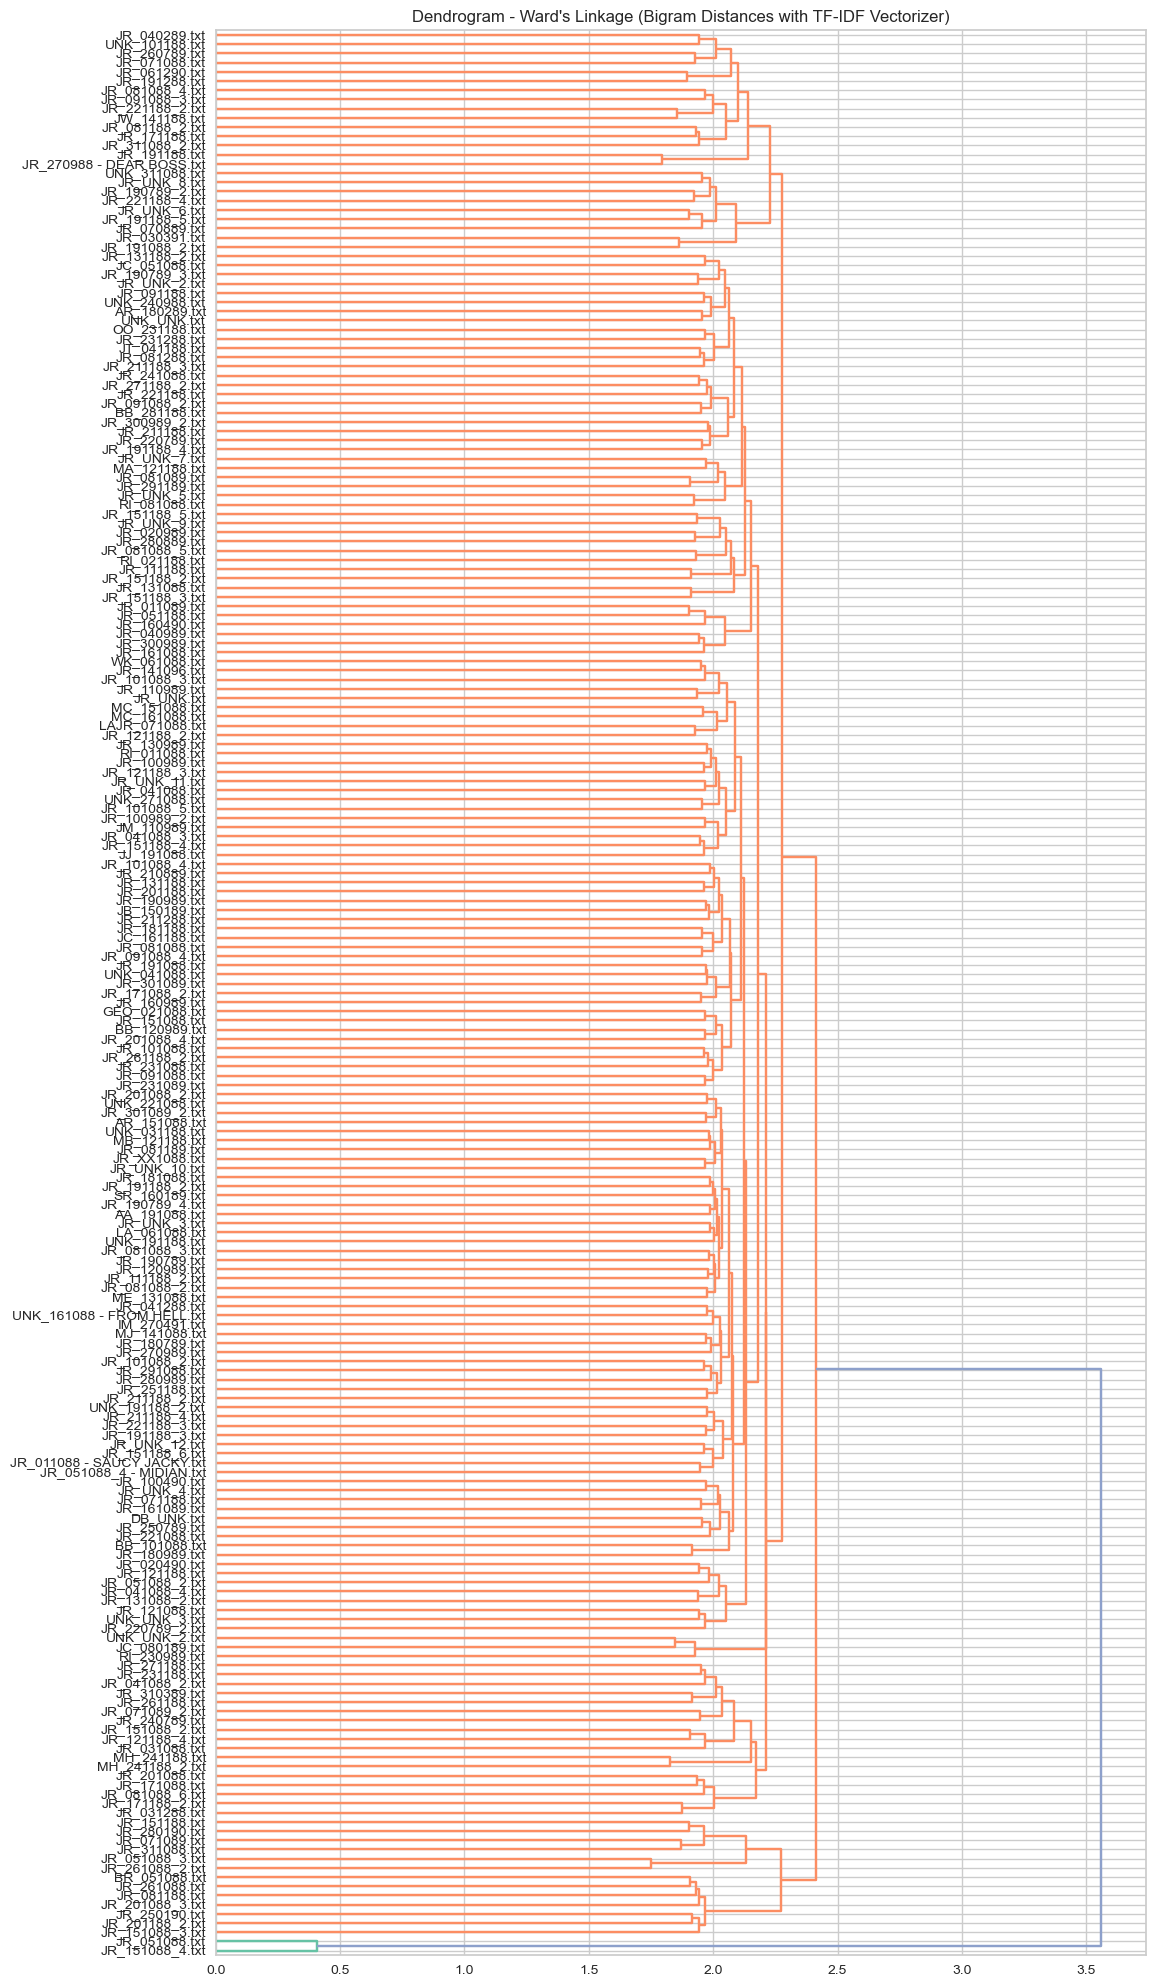

In [9]:
hierarchy.set_link_color_palette(['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3'])
ward = linkage(bigram_distance_tfidf, method = 'ward')

plt.figure(figsize = (12, 25))
dendrogram(ward, labels = letter_names, orientation = "right", leaf_font_size = 10, leaf_rotation = 0, above_threshold_color = '#8da0cb')
plt.title("Dendrogram - Ward's Linkage (Bigram Distances with TF-IDF Vectorizer)")
plt.show()

### Bigram Distances with Count Vectorizer

/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

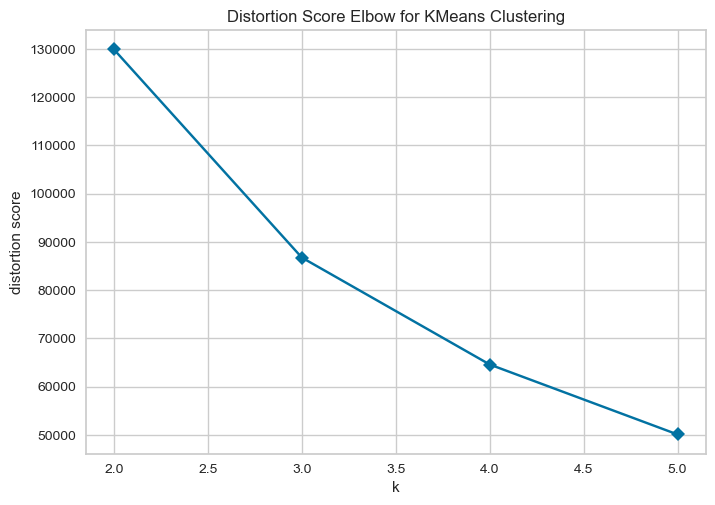

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (2, 2))
                             
count_matrix = vectorizer.fit_transform(letters_preprocessed)

bigram_distance_count = euclidean_distances(count_matrix)

#create Kmeans model
model = KMeans()

# create KElbowVisualizer with the model
visualizer = KElbowVisualizer(model, k = (2,6), timings = False, locate_elbow = False)

# fit it with the above calculated bigram distances according to the count vectorizer
visualizer.fit(bigram_distance_count)

visualizer.show()

In [11]:
km = KMeans(n_clusters = 3) 
clusters = km.fit_predict(bigram_distance_count) 

for x in range(len(letter_names)):
    print(letter_names[x], clusters[x])

JR_191188_4.txt 0
UNK_041088.txt 1
JR_221188.txt 0
JR_220789_2.txt 0
JR_191188_5.txt 1
JR_311088.txt 1
MH_241188_2.txt 1
JR_121188_3.txt 0
JR_211288.txt 1
JR_191088_2.txt 1
JR_240789.txt 1
BB_281188.txt 0
JM_110989.txt 0
JR_271188_2.txt 0
JR_071088.txt 1
JR_171088.txt 1
JR_280989.txt 1
JR_071089.txt 1
UNK_221088.txt 1
JR_211188_4.txt 1
JR_121188_2.txt 1
JR_280190.txt 1
JC_161188.txt 0
JR_160989.txt 1
JC_051088.txt 1
JW_141188.txt 0
JR_161088.txt 1
JR_151188.txt 1
JR_051188.txt 1
JR_250789.txt 2
JR_191188_2.txt 0
UNK_161088 - FROM HELL.txt 1
JR_191188_3.txt 0
JR_161089.txt 0
IM_270491.txt 1
JR_291088.txt 0
JR_211188_3.txt 0
JR_301089.txt 1
JR_231188.txt 1
JR_071089_2.txt 1
JR_201088.txt 1
JC_080189.txt 1
JR_211188_2.txt 1
JR_121188_4.txt 1
JR_300989.txt 1
JR_071188.txt 2
JR_171188.txt 0
JR_151088_2.txt 0
JR_041088.txt 2
JR_UNK_9.txt 0
JR_040989.txt 1
JR_201088_3.txt 1
JR_070889.txt 0
JB_150189.txt 1
JR_180789.txt 0
JR_201088_2.txt 0
JJ_191088.txt 0
JR_151188_6.txt 0
JR_UNK_8.txt 0
UNK_3

/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/8p/tfttmv8n3g34725p_r5jvgxc0000gn/T/ipykernel_59645/404268268.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  ward = linkage(bigram_distance_count, method = 'ward')


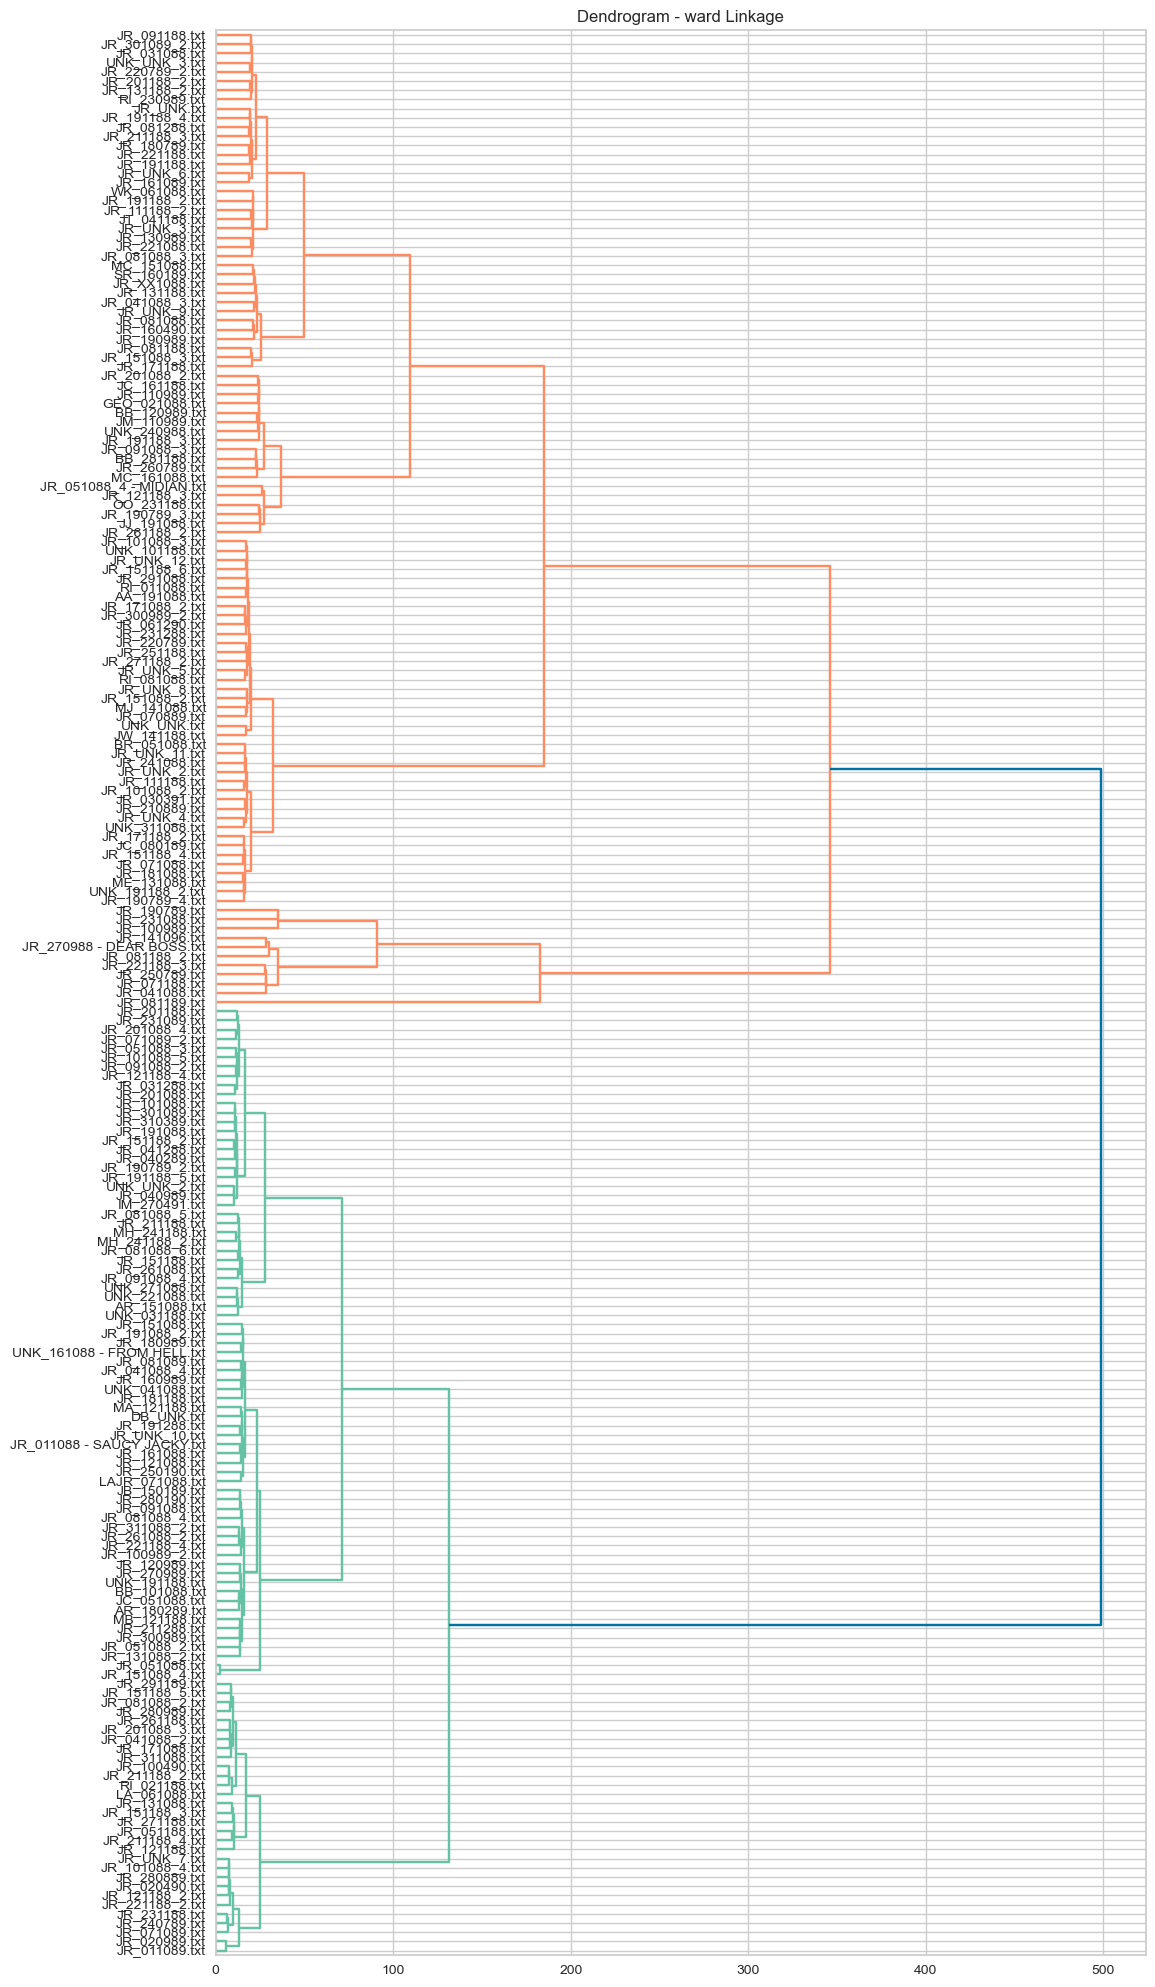

In [12]:
ward = linkage(bigram_distance_count, method = 'ward')

plt.figure(figsize = (12, 25))
dendrogram(ward, labels = letter_names, orientation = "right", leaf_font_size = 10, leaf_rotation = 0)
plt.title("Dendrogram - ward Linkage")
plt.show()

### Bigram Distances with Count Vectorizer and Jaccard Vectorizer

In [13]:
jaccard_distance = []

vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (1, 2))

count_matrix = vectorizer.fit_transform(letters_preprocessed)

count_array = count_matrix.toarray()

for i in range(len(letters_preprocessed)):
    for j in range(i + 1, len(letters_preprocessed)):
        jaccard = jaccard_score(count_array[i], count_array[j], average = 'macro')
        jaccard_distance.append(1 - jaccard)

/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

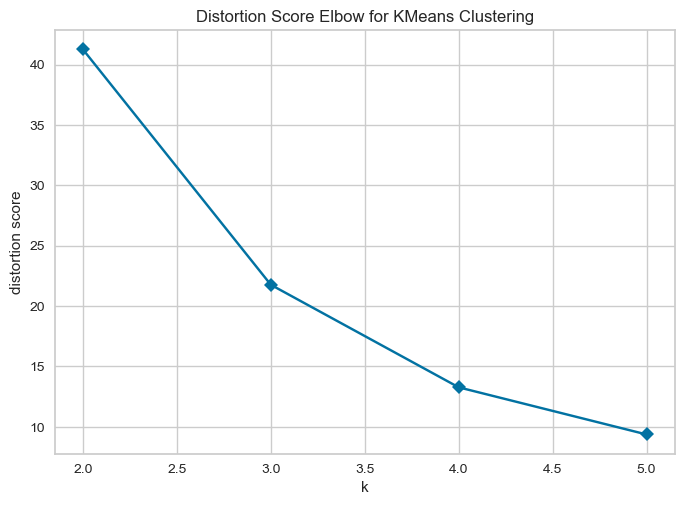

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
jaccard_distances_2d = np.array(jaccard_distance).reshape(-1, 1)

model = KMeans()

visualizer = KElbowVisualizer(model, k =( 2, 6), timings = False, locate_elbow = False)

visualizer.fit(jaccard_distances_2d)

visualizer.show()

In [15]:
# finding 3 groups using k-means clustering
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3) 
clusters = km.fit_predict(jaccard_distances_2d) 

# printing the name of each book and the cluster it is assigned to

for x in range(len(letter_names)):
    print(letter_names[x], clusters[x])

JR_191188_4.txt 1
UNK_041088.txt 0
JR_221188.txt 0
JR_220789_2.txt 0
JR_191188_5.txt 0
JR_311088.txt 0
MH_241188_2.txt 0
JR_121188_3.txt 1
JR_211288.txt 1
JR_191088_2.txt 0
JR_240789.txt 1
BB_281188.txt 1
JM_110989.txt 2
JR_271188_2.txt 1
JR_071088.txt 1
JR_171088.txt 0
JR_280989.txt 0
JR_071089.txt 0
UNK_221088.txt 0
JR_211188_4.txt 0
JR_121188_2.txt 0
JR_280190.txt 1
JC_161188.txt 1
JR_160989.txt 0
JC_051088.txt 0
JW_141188.txt 0
JR_161088.txt 0
JR_151188.txt 0
JR_051188.txt 1
JR_250789.txt 1
JR_191188_2.txt 1
UNK_161088 - FROM HELL.txt 1
JR_191188_3.txt 2
JR_161089.txt 0
IM_270491.txt 0
JR_291088.txt 1
JR_211188_3.txt 1
JR_301089.txt 0
JR_231188.txt 0
JR_071089_2.txt 0
JR_201088.txt 1
JC_080189.txt 0
JR_211188_2.txt 0
JR_121188_4.txt 0
JR_300989.txt 1
JR_071188.txt 1
JR_171188.txt 1
JR_151088_2.txt 1
JR_041088.txt 1
JR_UNK_9.txt 0
JR_040989.txt 0
JR_201088_3.txt 1
JR_070889.txt 1
JB_150189.txt 1
JR_180789.txt 1
JR_201088_2.txt 1
JJ_191088.txt 1
JR_151188_6.txt 1
JR_UNK_8.txt 1
UNK_3

/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


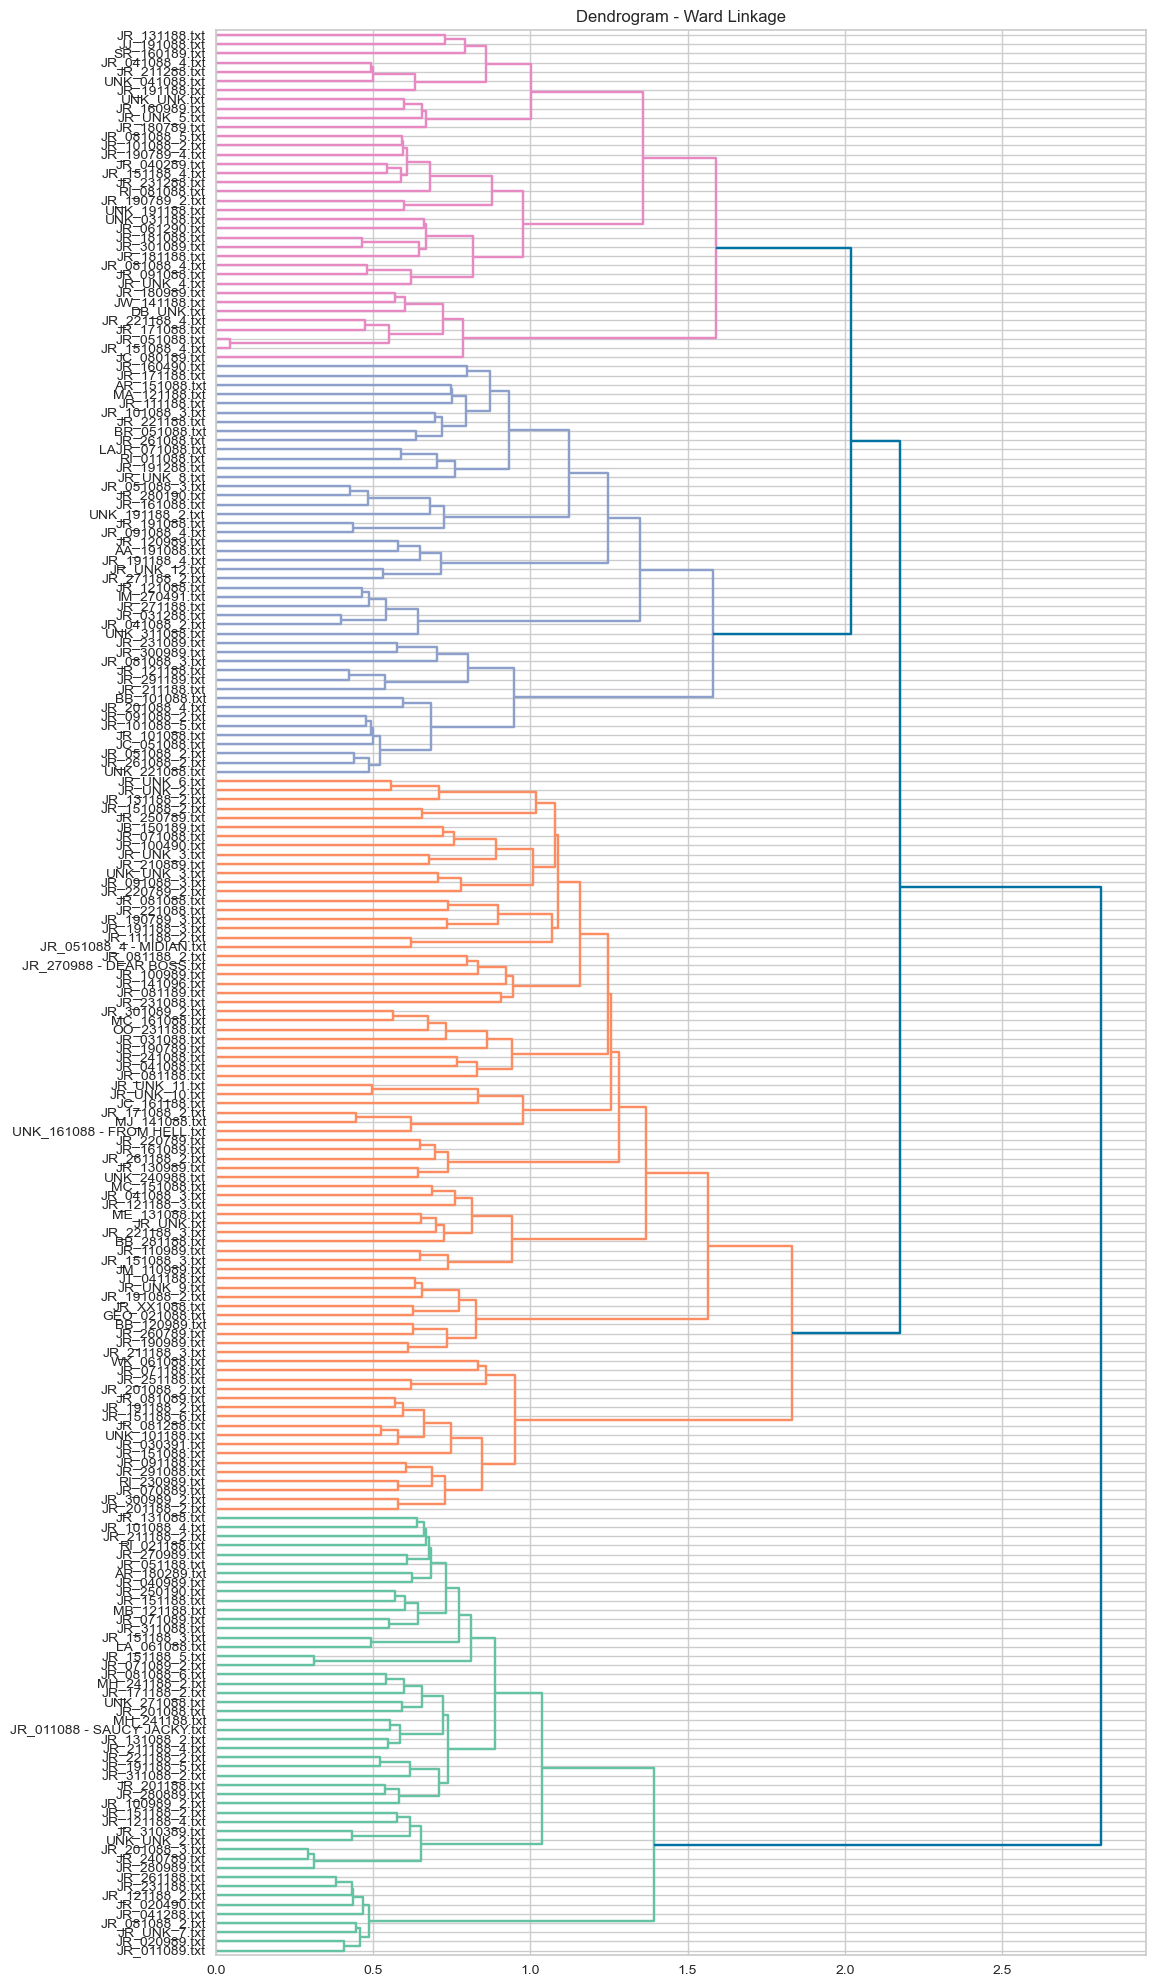

In [16]:
distance_matrix = np.array(jaccard_distance)

#distance_matrix_square = ssd.squareform(distance_matrix)

ward = linkage(distance_matrix, method = 'ward')

plt.figure(figsize = (12, 25))
dendrogram(ward, labels = letter_names, orientation = "right", leaf_font_size = 10, leaf_rotation = 0)
plt.title("Dendrogram - Ward Linkage")
plt.show()

### Bigram Distances with TF-IDF Vectorizer and Jaccard Vectorizer

In [17]:
y_pred = [0, 2, 1, 2]
y_true = [0, 1, 2, 2]
jaccard_score(y_true, y_pred, average=None)


array([1.        , 0.        , 0.33333333])

In [18]:
#round 4,5,6,7 decimals
#scale by multiplying by a 100000000
#but the decimal points are like this even with the limiting
#  (208, 6365)	0.1028
#  (208, 6521)	0.1568
#  (208, 6997)	0.11220000000000001
#  (208, 7114)	0.1568
#  (208, 7164)	0.12200000000000001

# Set the scaling factor
#scaling_factor = 100000

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score
import numpy as np

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2, 2))

# Fit and transform the data to obtain the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(letters_preprocessed)

# Round the TF-IDF matrix to the desired number of decimal places
tfidf_matrix_rounded = np.round(tfidf_matrix, decimals=4)

print(tfidf_matrix_rounded)

# Convert the rounded TF-IDF matrix to an array
tfidf_array_rounded = tfidf_matrix_rounded.toarray()

# Initialize a list to store Jaccard distances
jaccard_distance = []

# Calculate Jaccard distances for each pair of documents
for i in range(len(letters_preprocessed)):
    for j in range(i + 1, len(letters_preprocessed)):
        jaccard = jaccard_score(tfidf_array_rounded[i], tfidf_array_rounded[j], average='macro')
        jaccard_distance.append(1 - jaccard)

print(jaccard_distance)


  (0, 409)	0.1797
  (0, 445)	0.1154
  (0, 468)	0.08990000000000001
  (0, 657)	0.1154
  (0, 709)	0.1154
  (0, 758)	0.1154
  (0, 887)	0.1154
  (0, 916)	0.1154
  (0, 1123)	0.1154
  (0, 1143)	0.1154
  (0, 1251)	0.1154
  (0, 1258)	0.1154
  (0, 1263)	0.1154
  (0, 1328)	0.0674
  (0, 1352)	0.093
  (0, 1398)	0.1072
  (0, 1659)	0.1072
  (0, 1951)	0.1154
  (0, 2003)	0.1154
  (0, 2252)	0.093
  (0, 2266)	0.1072
  (0, 2321)	0.186
  (0, 2792)	0.1154
  (0, 2803)	0.1154
  (0, 2827)	0.1072
  :	:
  (208, 4627)	0.09190000000000001
  (208, 5085)	0.1618
  (208, 5109)	0.1502
  (208, 5151)	0.11570000000000001
  (208, 5345)	0.1618
  (208, 5421)	0.1419
  (208, 5497)	0.1419
  (208, 5594)	0.1502
  (208, 5900)	0.1618
  (208, 6152)	0.1419
  (208, 6214)	0.1061
  (208, 6370)	0.1618
  (208, 6839)	0.11570000000000001
  (208, 6954)	0.1618
  (208, 7003)	0.1259
  (208, 8100)	0.0364
  (208, 8259)	0.1618
  (208, 8399)	0.1618
  (208, 8582)	0.1618
  (208, 8600)	0.0833
  (208, 8864)	0.1618
  (208, 9294)	0.1618
  (208, 9535)	0.

ValueError: continuous is not supported

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score
import numpy as np

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2, 2))

# Fit and transform the data to obtain the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(letters_preprocessed)

# Round the TF-IDF matrix to the desired number of decimal places
tfidf_matrix_rounded = np.round(tfidf_matrix, decimals=4)

# Process each element in the matrix to truncate decimals
for i in range(tfidf_matrix_rounded.shape[0]):
    for j in range(tfidf_matrix_rounded.shape[1]):
        if tfidf_matrix_rounded[i, j] % 1 != 0:  # Check if the value has decimals
            decimal_places = len(str(tfidf_matrix_rounded[i, j]).split('.')[1])
            if decimal_places > 4:  # Check if there are more than four decimal places
                tfidf_matrix_rounded[i, j] = round(tfidf_matrix_rounded[i, j], 4)

print(tfidf_matrix_rounded)
# Convert the rounded TF-IDF matrix to an array
tfidf_array_rounded = tfidf_matrix_rounded.toarray()

# Initialize a list to store Jaccard distances
jaccard_distance = []

# Calculate Jaccard distances for each pair of documents
for i in range(len(letters_preprocessed)):
    for j in range(i + 1, len(letters_preprocessed)):
        jaccard = jaccard_score(tfidf_array_rounded[i], tfidf_array_rounded[j], average='macro')
        jaccard_distance.append(1 - jaccard)

print(jaccard_distance)

  (0, 409)	0.1797
  (0, 445)	0.1154
  (0, 468)	0.0899
  (0, 657)	0.1154
  (0, 709)	0.1154
  (0, 758)	0.1154
  (0, 887)	0.1154
  (0, 916)	0.1154
  (0, 1123)	0.1154
  (0, 1143)	0.1154
  (0, 1251)	0.1154
  (0, 1258)	0.1154
  (0, 1263)	0.1154
  (0, 1328)	0.0674
  (0, 1352)	0.093
  (0, 1398)	0.1072
  (0, 1659)	0.1072
  (0, 1951)	0.1154
  (0, 2003)	0.1154
  (0, 2252)	0.093
  (0, 2266)	0.1072
  (0, 2321)	0.186
  (0, 2792)	0.1154
  (0, 2803)	0.1154
  (0, 2827)	0.1072
  :	:
  (208, 4627)	0.0919
  (208, 5085)	0.1618
  (208, 5109)	0.1502
  (208, 5151)	0.1157
  (208, 5345)	0.1618
  (208, 5421)	0.1419
  (208, 5497)	0.1419
  (208, 5594)	0.1502
  (208, 5900)	0.1618
  (208, 6152)	0.1419
  (208, 6214)	0.1061
  (208, 6370)	0.1618
  (208, 6839)	0.1157
  (208, 6954)	0.1618
  (208, 7003)	0.1259
  (208, 8100)	0.0364
  (208, 8259)	0.1618
  (208, 8399)	0.1618
  (208, 8582)	0.1618
  (208, 8600)	0.0833
  (208, 8864)	0.1618
  (208, 9294)	0.1618
  (208, 9535)	0.0863
  (208, 9694)	0.1618
  (208, 10182)	0.0714


ValueError: continuous is not supported

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score
import numpy as np

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2, 2))

# Fit and transform the data to obtain the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(letters_preprocessed)

scaler = MaxAbsScaler()
tfidf_matrix_scaled = scaler.fit_transform(tfidf_matrix_rounded)

print(tfidf_matrix_scaled)
#  (0, 445)	1.0
#  (0, 468)	0.5837662337662337
#  (0, 657)	1.0
#  (0, 709)	1.0
#  (0, 758)	1.0
# Round the TF-IDF matrix to the desired number of decimal places
tfidf_matrix_rounded = np.round(tfidf_matrix_scaled, decimals=4)

print(tfidf_matrix_rounded)

#print(tfidf_matrix_rounded)

# Convert the rounded TF-IDF matrix to an array
tfidf_array_rounded = tfidf_matrix_rounded.toarray()

# Initialize a list to store Jaccard distances
jaccard_distance = []

# Calculate Jaccard distances for each pair of documents
for i in range(len(letters_preprocessed)):
    for j in range(i + 1, len(letters_preprocessed)):
        jaccard = jaccard_score(tfidf_array_rounded[i], tfidf_array_rounded[j], average='macro')
        jaccard_distance.append(1 - jaccard)

print(jaccard_distance)
# Scale the TF-IDF matrix
scaler = MinMaxScaler()
tfidf_matrix_scaled = scaler.fit_transform(tfidf_matrix_rounded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


ValueError: continuous is not supported

In [ ]:
from sklearn.preprocessing import Binarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score
import numpy as np

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2, 2))

# Fit and transform the data to obtain the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(letters_preprocessed)

# Round the TF-IDF matrix to the desired number of decimal places
tfidf_matrix_rounded = np.round(tfidf_matrix.toarray(), decimals=4)

# Discretize the TF-IDF values
binarizer = Binarizer()
tfidf_matrix_binarized = binarizer.fit_transform(tfidf_matrix_rounded)

# Initialize a list to store Jaccard distances
jaccard_distance = []

# Calculate Jaccard distances for each pair of documents
for i in range(len(letters_preprocessed)):
    for j in range(i + 1, len(letters_preprocessed)):
        jaccard = jaccard_score(tfidf_matrix_binarized[i], tfidf_matrix_binarized[j], average='macro')
        jaccard_distance.append(1 - jaccard)

print(jaccard_distance)


[0.5026380998248947, 0.49614234310014493, 0.49976906601159243, 0.4969719320088778, 0.48520079278031136, 0.48883606435704796, 0.5056022561664795, 0.4982582448485148, 0.49911731786731783, 0.4940360860943568, 0.493762623502888, 0.5040673803008282, 0.4980015462625633, 0.49686097577093835, 0.4949557602934548, 0.4949557602934548, 0.4945054945054945, 0.5058858151854031, 0.49566807855217554, 0.4839447406493126, 0.4985871271585557, 0.5107906611732391, 0.49177105582173986, 0.49803414442700156, 0.49625636262872097, 0.4988017934446506, 0.49398567363359824, 0.4953885400313972, 0.49908504350574345, 0.5067023206049939, 0.5065234451638219, 0.4974010898452741, 0.498111078402512, 0.505444379046498, 0.5009633223918939, 0.496380534549443, 0.4921225825667799, 0.4940360860943568, 0.4926130730631152, 0.4973364345738296, 0.5030971098380957, 0.5048557975279576, 0.49709467120181405, 0.4988017934446506, 0.5000717585097381, 0.4977450420041195, 0.5014128111331615, 0.49814972869932905, 0.49452100510404395, 0.505395

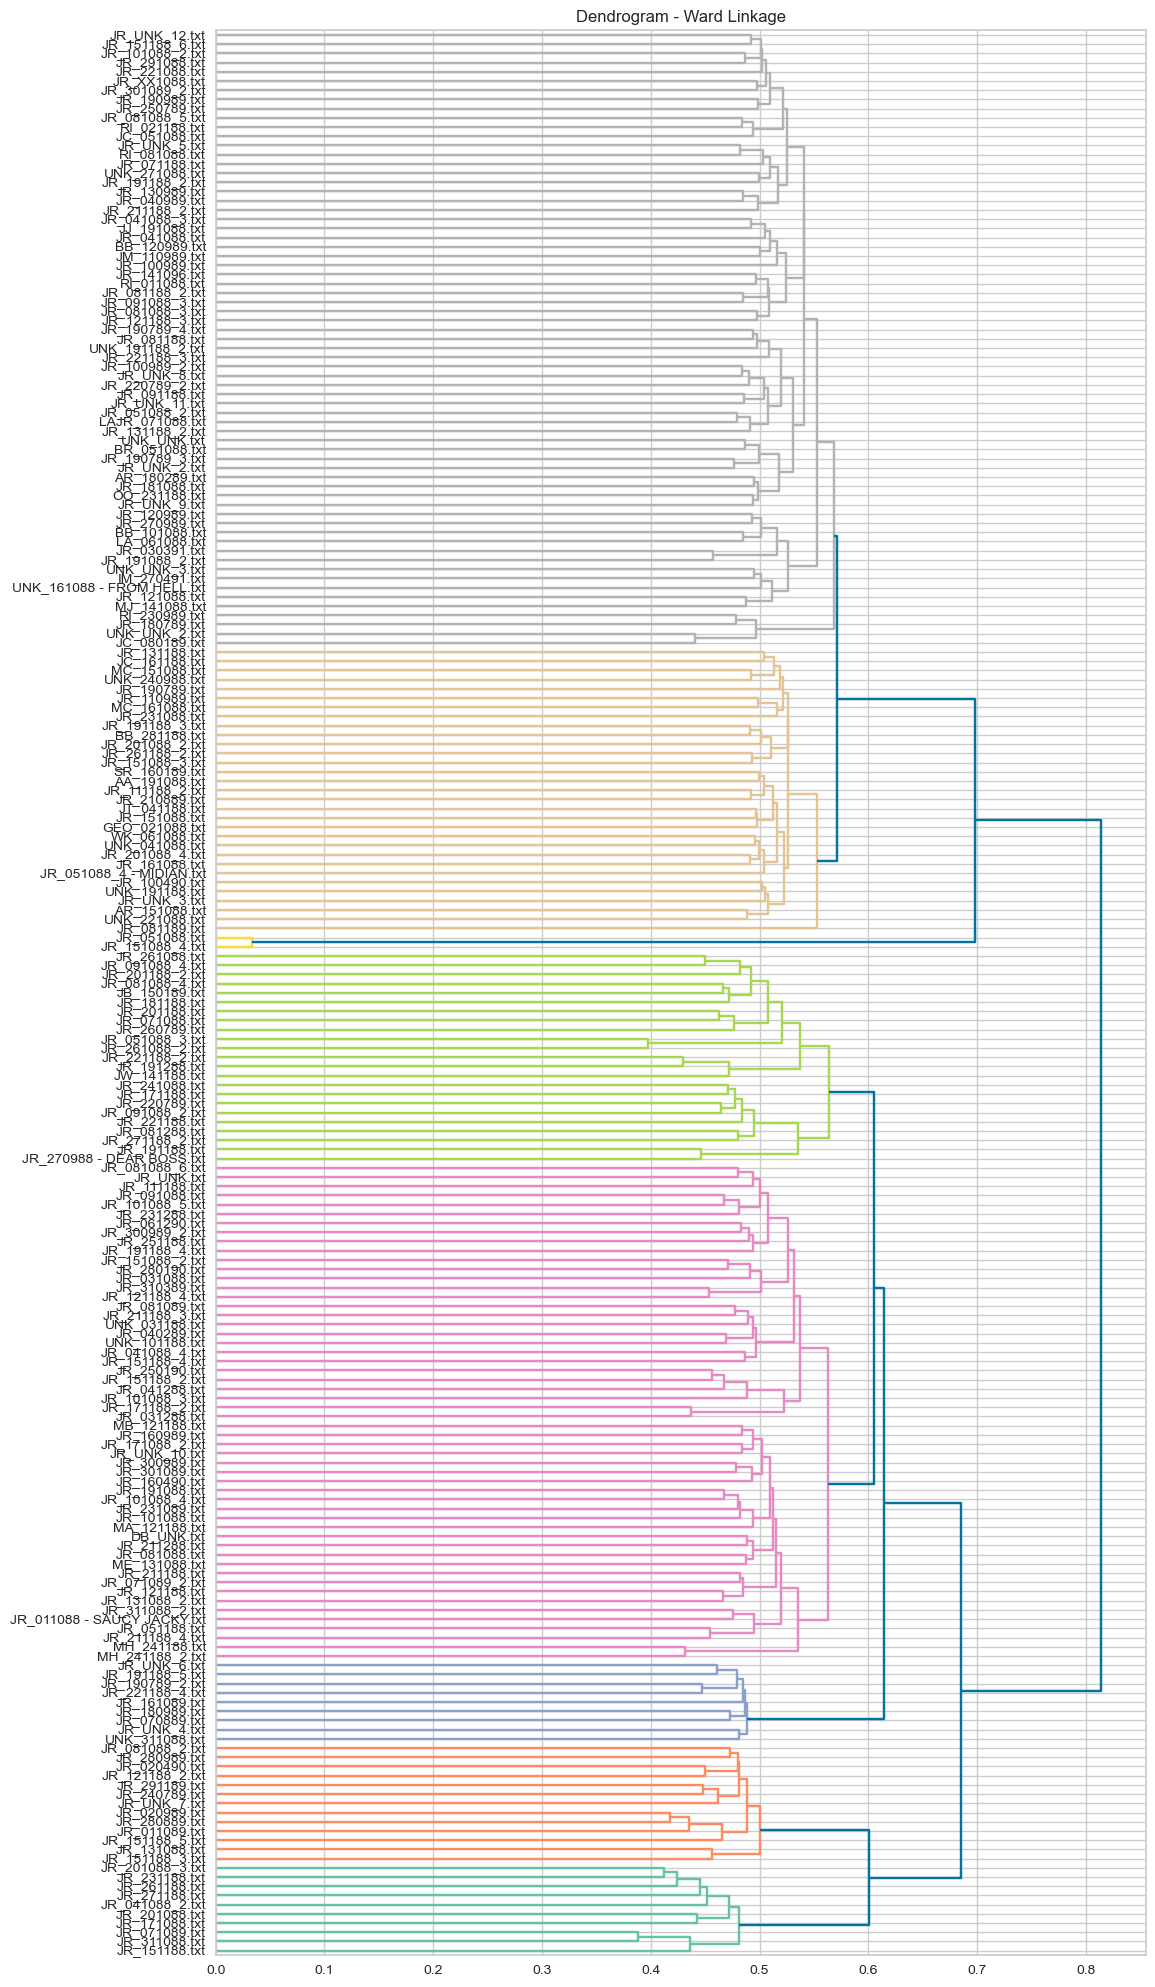

In [26]:
distance_matrix = np.array(jaccard_distance)

#distance_matrix_square = ssd.squareform(distance_matrix)

ward = linkage(distance_matrix, method = 'ward')

plt.figure(figsize = (12, 25))
dendrogram(ward, labels = letter_names, orientation = "right", leaf_font_size = 10, leaf_rotation = 0)
plt.title("Dendrogram - Ward Linkage")
plt.show()